# Метод (алгоритм) k-ближайших соседей

### Краткое описание метода
- Значение целевого признака определяется на основе значений целевых признаков тех объектов, которые находятся ближе всего к искомому объекту в пространстве признаков. Один из наиболее простых методов.

- Исторически является одним из наиболее известных методов. В терминологии Data Mining рассматривался как основной алгоритм поиска по прецедентам.

- Метод может использоваться как для классификации, так и для регресии.

- Как правило, метод k-NN показывает худшее качество, по сравнению с другими, более сложными методами.

## Постановка задачи
Пусть дана обучающая выборка:
- $X^{train}$ - матрица объекты-признаки (feature matrix);
- если необходимо указать конкретный элемент матрицы, то будем использовать  обозначение $X_{o, f}^{train}$, где $o$ - индекс объекта (соответствуют строке матрицы), а $f$ - индекс признака (соответствуют столбцу матрицы);
- $Y^{train}$ - вектор целевого признака;
- если необходимо указать конкретный элемент вектора, то будем использовать  обозначение $Y_{o}^{train}$, где $o$ - индекс объекта (соответствуют индексу вектора);
- можно рассматривать $X^{train}|Y^{train}$ как блочную матрицу, количество  строк в матрице $X^{train}$ соответствует размерности вектора $Y^{train}$.

На основании алгоритма $Alg$, который использует гиперпараметры $H$, для обучающей выборки строится модель $M:X^{train} \rightarrow Y^{train}$, которая устанавливает соответствие между $X^{train}$ и $Y^{train}$: $M=Alg.fit(X^{train},Y^{train},H)$.

Также дана тестовая выборка $X^{test}$ для которой на основании найденной модели $M$  необходимо найти (предсказать) значения  $Y^{test}=Alg.predict(M, X^{test})$.

В случае k-NN:
- в качестве алгоритма $Alg$ используется метод k-ближайших соседей;
- количество ближайших соседей $k$ является гиперпараметром алгоритма, то есть до начала работы алгоритма необходимо задать количество ближайших соседей $K$, значения $Y^{train}$ которых будут использованы для нахождения   $Y^{test}$.

## Простая реализация алгоритма на языке Python

In [1]:
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import math

In [2]:
from enum import Enum
class PredictionType(Enum):
    CLASSIFICATION = 1
    REGRESSION = 2

In [3]:
class SimpleKNN:
    
    def fit(self, X_train: np.matrix, y_train: np.ndarray):
        """
        Метод обучения, который фактически не учится, 
        а только запоминает обучающую выборку.
        Входные параметры:
        X_train - обучающая выборка (матрица объект-признак)
        y_train - обучающая выборка (вектор целевого признака)
        Возвращаемое значение: нет
        """
        #Сохраняем параметры в переменных класса
        self._X_train = X_train
        self._y_train = y_train
          
    def eucl_dist(self, p: np.ndarray, q: np.ndarray) -> float:
        """
        Вычисление Евклидова расстояния 
        Входные параметры:
        p, q - вектора в n-мерном пространстве признаков
        """
        return math.sqrt(sum([(pi - qi) ** 2 for pi, qi in zip (p, q)]))
            
            
    def predict_for_single_object(self, K: int, \
                prediction_type: PredictionType, \
                X_o: np.ndarray, \
                verbose = True) -> np.ndarray:
        """
        Метод предсказания для одного объекта.
        Входные параметры:
        K - гиперпараметр, количество соседей 
        prediction_type - классификация или регрессия 
        X_o - строка матрицы объект-признак, соответствующая объекту
        verbose - флаг детального вывода
        Возвращаемое значение: предсказанное значение целевого признака
        """
        # список соседей
        neighbors_list = []
        # *** Находим ближайшие точки ***
        # Перебираем все точки обучающей выборки
        for i in range(self._X_train.shape[0]):
            # получаем текущую точку
            data_train_current_x = [x for x in self._X_train[['x1','x2']].iloc[i]]
            # и значение ее y
            data_train_current_y = self._y_train[i]
            # вычисляем расстояние
            dist = self.eucl_dist(X_o, data_train_current_x)
            # сохраняем в список соседей
            temp_res = (data_train_current_y, dist, data_train_current_x)
            neighbors_list.append(temp_res)
        # *** сортируем список соседей по возрастанию расстояния *** 
        # в кортеже элементы следуют в порядке (0,1,2), сортируем по первому элементу 
        neighbors_list_sorted = sorted(neighbors_list, key=itemgetter(1))
        if verbose:
            print()
            print('**************************************')
            print('Проверяемая точка: ', X_o)
            print('**************************************')
            print('Вывод отсортированного списка соседей:')    
            dist_list = []
            for cur_y, cur_dist, temp_x_1_2 in neighbors_list_sorted:
                temp_x1, temp_x2 = temp_x_1_2
                print('X1={0}, X2={1}, y={2}, расстояние={3:.2f}'.format(temp_x1, temp_x2, cur_y, cur_dist))
                dist_list.append(cur_dist)
            print()
            print('Вывод расстояния для отсортированного списка соседей:')    
            plt.plot(dist_list)
            plt.show()
        # Оставим только K ближайших соседей
        K_neighbors_list_sorted = neighbors_list_sorted[:K]
        if verbose:
            print('Вывод К ближайших соседей:')
            x1_list = []
            x2_list = []
            for cur_y, cur_dist, temp_x_1_2 in K_neighbors_list_sorted:
                temp_x1, temp_x2 = temp_x_1_2
                x1_list.append(temp_x1)
                x2_list.append(temp_x2)
                print('X1={0}, X2={1}, y={2}, расстояние={3:.2f}'.format(temp_x1, temp_x2, cur_y, cur_dist))
            print()
            print('Визуализация К ближайших соседей:')
            plt.plot(self._X_train['x1'], self._X_train['x2'], 'b.', \
                     x1_list, x2_list,  'g*', \
                    [X_o[0]], [X_o[1]], 'ro')
            plt.show()   
        # Результат - классификация или регрессия
        if prediction_type == PredictionType.REGRESSION:
            # используем numpy для вычисления среднего значения
            arr = np.array([x for x,_,_ in K_neighbors_list_sorted])
            # возвращаем среднее значение
            return np.mean(arr)          
        elif prediction_type == PredictionType.CLASSIFICATION:
            k_y_list = [y for y,_,_ in K_neighbors_list_sorted]
            # группируем с количеством метки классов,
            # соответствующие K ближайшим соседям
            k_y_list_grouped_temp = np.unique(k_y_list, return_counts=True)
            k_y_list_grouped = [[key, cnt] for key, cnt in zip(k_y_list_grouped_temp[0], k_y_list_grouped_temp[1])]
            # сортируем по количеству по убыванию
            k_y_list_grouped_sorted = sorted(k_y_list_grouped, key=itemgetter(1), reverse=True)
            if verbose:
                print('Классы, соответствующие К ближайшим соседям:')
                for i in k_y_list_grouped_sorted:
                    print('класс={0}, количество элементов={1}'.format(i[0], i[1]))
            # возвращаеv метку класса из первой строки отсортированного массива
            # то есть того класса, к которому принадлежит наибольшее количество соседей
            return k_y_list_grouped_sorted[0][0]
        else:
            raise Exception('Неизвестный тип предсказания')
                   
    
    def predict(self, K: int, \
                prediction_type: PredictionType, \
                X_test: np.matrix, 
                verbose = True) -> np.ndarray:
        """
        Метод предсказания.
        Входные параметры:
        K - гиперпараметр, количество соседей 
        prediction_type - классификация или регрессия 
        X_test - тестовая выборка (матрица объект-признак)
        Возвращаемое значение: предсказанный вектор целевого признака
        """
        # Перебираем все точки тестовой выборки
        test_data_temp = []
        for i in range(X_test.shape[0]):
            # получаем текущую точку
            data_test_current_x = [x for x in X_test.iloc[i]]
            test_data_temp.append(data_test_current_x)       
        return [self.predict_for_single_object(K=K, \
                prediction_type=prediction_type, \
                X_o=i, verbose=verbose) for i in test_data_temp]


### Обучающая и тестовая выборки

- В качестве обучающей выборки будем использовать данные по распознованию вин
- Если разные признаки имеют сильно отличающиеся диапазоны значений, то применяют масштабирование исходных данных.

In [4]:
import pandas as pd

In [5]:
# чтение обучающей выборки
data = pd.read_csv('data/wine_data.csv', sep=",")
data

,Alcohol,Malic_acid,Ash,Alkalinity_of_ash,Magnesium,Total_phenols,Flavonoids,Nonflavonoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [6]:
data_train = data[['Malic_acid', 'Alkalinity_of_ash', 'Proline', 'Class']]
data_train = data_train.rename(columns={'Malic_acid': 'x1', 'Alkalinity_of_ash': 'x2', 'Proline': 'y', 'Class': 'y_clas'})

In [7]:
data_train

,x1,x2,y,y_clas
0,1.71,15.6,1065,0
1,1.78,11.2,1050,0
2,2.36,18.6,1185,0
3,1.95,16.8,1480,0
4,2.59,21.0,735,0
...,...,...,...,...
173,5.65,20.5,740,2
174,3.91,23.0,750,2
175,4.28,20.0,835,2
176,2.59,20.0,840,2


Целевой признак $Class$ предназначен для регресии

In [8]:
# тестовая выборка
data_test = pd.DataFrame({
    'x1': np.random.uniform(low=1.11, high=4.50, size=5),
    'x2': np.random.uniform(low=11.1, high=20.0, size=5)
})

data_test = data_test.round(2)
data_test

,x1,x2
0,2.20,17.04
1,3.13,12.44
2,2.08,17.61
3,1.59,12.60
4,4.10,16.67


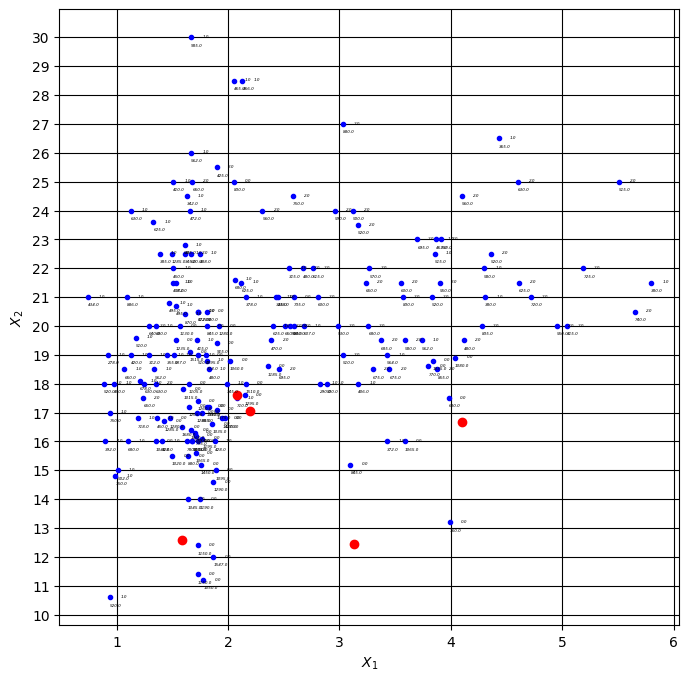

In [9]:
# визуализация выборки
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(data_train['x1'], data_train['x2'], 'b.', \
         data_test['x1'], data_test['x2'], 'ro')

# деления на осях и сетка
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.grid(which='major', color = 'k')

# подписи к осям
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
   
# подписи 
for coords in data_train[['x1','x2', 'y', 'y_clas']].values:
    x1, x2, y_cl, cl = coords[0], coords[1], coords[2], coords[3]
    #label = '{} ({})'.format(y_cl, cl)
    #ax.text(x1 + 0.1, x2, label, style='italic', fontsize=7)
    ax.text(x1 + 0.1, x2, cl, style='italic', fontsize=3)
    ax.text(x1, x2-0.3, y_cl, style='italic', fontsize=3)

plt.show()

### Фаза обучения

#### Пример с регрессией

In [10]:
# создаем объект класса
simple_knn_regr = SimpleKNN()

In [11]:
# вызываем метод обучения
simple_knn_regr.fit(data_train[['x1','x2']], data_train['y'])

In [12]:
# параметры метода
# матрица объект-признак
simple_knn_regr._X_train

,x1,x2
0,1.71,15.6
1,1.78,11.2
2,2.36,18.6
3,1.95,16.8
4,2.59,21.0
...,...,...
173,5.65,20.5
174,3.91,23.0
175,4.28,20.0
176,2.59,20.0


In [13]:
# вектор целевого признака
simple_knn_regr._y_train

0      1065
1      1050
2      1185
3      1480
4       735
       ... 
173     740
174     750
175     835
176     840
177     560
Name: y, Length: 178, dtype: int64

#### Пример с классификацией

In [14]:
simple_knn_clas = SimpleKNN()
simple_knn_clas.fit(data_train[['x1','x2']], data_train['y_clas'])

In [15]:
simple_knn_clas._X_train

,x1,x2
0,1.71,15.6
1,1.78,11.2
2,2.36,18.6
3,1.95,16.8
4,2.59,21.0
...,...,...
173,5.65,20.5
174,3.91,23.0
175,4.28,20.0
176,2.59,20.0


In [16]:
simple_knn_clas._y_train

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: y_clas, Length: 178, dtype: int64

### Фаза предсказания

In [17]:
# первая строка тестовой выборки
data_test_0 = [x for x in data_test[['x1','x2']].iloc[0]]
data_test_0

[2.2, 17.04]


**************************************
Проверяемая точка:  [2.2, 17.04]
**************************************
Вывод отсортированного списка соседей:
X1=1.9, X2=17.1, y=1375, расстояние=0.31
X1=1.97, X2=16.8, y=1270, расстояние=0.33
X1=1.95, X2=16.8, y=1480, расстояние=0.35
X1=1.83, X2=17.2, y=990, расстояние=0.40
X1=1.81, X2=17.2, y=1310, расстояние=0.42
X1=1.77, X2=17.0, y=885, расстояние=0.43
X1=2.08, X2=17.5, y=710, расстояние=0.48
X1=1.72, X2=17.0, y=1285, расстояние=0.48
X1=1.86, X2=16.6, y=1035, расстояние=0.56
X1=2.15, X2=17.6, y=1295, расстояние=0.56
X1=1.65, X2=17.2, y=1265, расстояние=0.57
X1=1.73, X2=17.4, y=1260, расстояние=0.59
X1=1.48, X2=16.8, y=1280, расстояние=0.76
X1=1.59, X2=16.5, y=1680, расстояние=0.81
X1=1.67, X2=16.4, y=1060, расстояние=0.83
X1=1.43, X2=16.7, y=1285, расстояние=0.84
X1=1.36, X2=16.8, y=450, расстояние=0.87
X1=1.7, X2=16.3, y=970, расстояние=0.89
X1=2.16, X2=18.0, y=1510, расстояние=0.96
X1=1.6, X2=17.8, y=1015, расстояние=0.97
X1=1.71, X2=16.2,

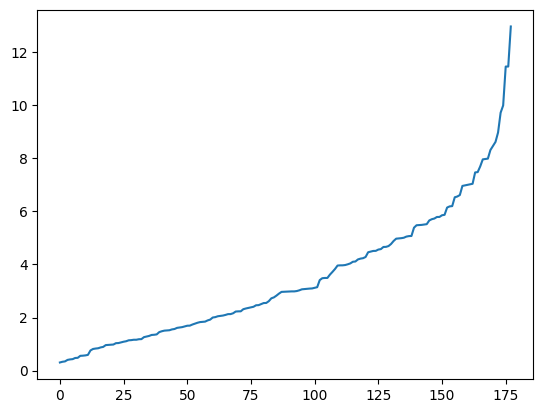

Вывод К ближайших соседей:
X1=1.9, X2=17.1, y=1375, расстояние=0.31
X1=1.97, X2=16.8, y=1270, расстояние=0.33
X1=1.95, X2=16.8, y=1480, расстояние=0.35
X1=1.83, X2=17.2, y=990, расстояние=0.40
X1=1.81, X2=17.2, y=1310, расстояние=0.42

Визуализация К ближайших соседей:


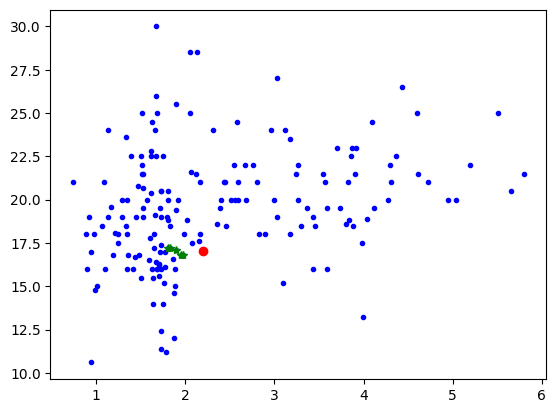

np.float64(1285.0)

In [18]:
# построим предсказание для одного объекта (регрессия)
simple_knn_regr_0 = simple_knn_regr.predict_for_single_object(K=5, \
                          prediction_type=PredictionType.REGRESSION, \
                          X_o=data_test_0)
simple_knn_regr_0

In [19]:
# Среднее значение y для соседей
np.mean([1035, 564, 1080, 770, 855])

np.float64(860.8)


**************************************
Проверяемая точка:  [2.2, 17.04]
**************************************
Вывод отсортированного списка соседей:
X1=1.9, X2=17.1, y=0, расстояние=0.31
X1=1.97, X2=16.8, y=0, расстояние=0.33
X1=1.95, X2=16.8, y=0, расстояние=0.35
X1=1.83, X2=17.2, y=0, расстояние=0.40
X1=1.81, X2=17.2, y=0, расстояние=0.42
X1=1.77, X2=17.0, y=0, расстояние=0.43
X1=2.08, X2=17.5, y=1, расстояние=0.48
X1=1.72, X2=17.0, y=0, расстояние=0.48
X1=1.86, X2=16.6, y=0, расстояние=0.56
X1=2.15, X2=17.6, y=0, расстояние=0.56
X1=1.65, X2=17.2, y=0, расстояние=0.57
X1=1.73, X2=17.4, y=0, расстояние=0.59
X1=1.48, X2=16.8, y=0, расстояние=0.76
X1=1.59, X2=16.5, y=0, расстояние=0.81
X1=1.67, X2=16.4, y=0, расстояние=0.83
X1=1.43, X2=16.7, y=0, расстояние=0.84
X1=1.36, X2=16.8, y=1, расстояние=0.87
X1=1.7, X2=16.3, y=0, расстояние=0.89
X1=2.16, X2=18.0, y=0, расстояние=0.96
X1=1.6, X2=17.8, y=0, расстояние=0.97
X1=1.71, X2=16.2, y=0, расстояние=0.97
X1=1.99, X2=18.0, y=1, расстояние

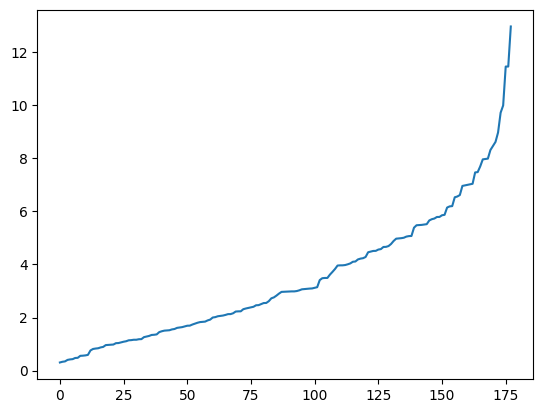

Вывод К ближайших соседей:
X1=1.9, X2=17.1, y=0, расстояние=0.31
X1=1.97, X2=16.8, y=0, расстояние=0.33
X1=1.95, X2=16.8, y=0, расстояние=0.35
X1=1.83, X2=17.2, y=0, расстояние=0.40
X1=1.81, X2=17.2, y=0, расстояние=0.42

Визуализация К ближайших соседей:


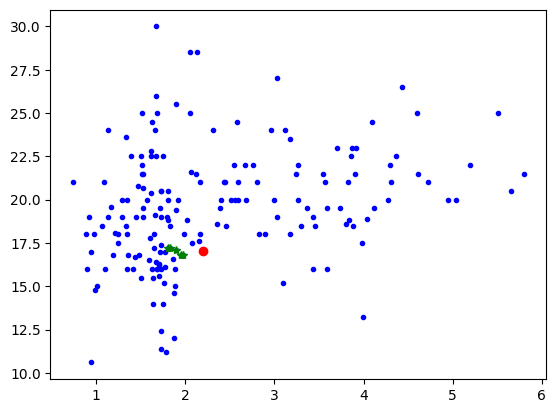

Классы, соответствующие К ближайшим соседям:
класс=0, количество элементов=5


np.int64(0)

In [20]:
# построим предсказание для одного объекта (классификация)
simple_knn_clas_0 = simple_knn_clas.predict_for_single_object(K=5, \
                          prediction_type=PredictionType.CLASSIFICATION, \
                          X_o=data_test_0)
simple_knn_clas_0


**************************************
Проверяемая точка:  [2.2, 17.04]
**************************************
Вывод отсортированного списка соседей:
X1=1.9, X2=17.1, y=1375, расстояние=0.31
X1=1.97, X2=16.8, y=1270, расстояние=0.33
X1=1.95, X2=16.8, y=1480, расстояние=0.35
X1=1.83, X2=17.2, y=990, расстояние=0.40
X1=1.81, X2=17.2, y=1310, расстояние=0.42
X1=1.77, X2=17.0, y=885, расстояние=0.43
X1=2.08, X2=17.5, y=710, расстояние=0.48
X1=1.72, X2=17.0, y=1285, расстояние=0.48
X1=1.86, X2=16.6, y=1035, расстояние=0.56
X1=2.15, X2=17.6, y=1295, расстояние=0.56
X1=1.65, X2=17.2, y=1265, расстояние=0.57
X1=1.73, X2=17.4, y=1260, расстояние=0.59
X1=1.48, X2=16.8, y=1280, расстояние=0.76
X1=1.59, X2=16.5, y=1680, расстояние=0.81
X1=1.67, X2=16.4, y=1060, расстояние=0.83
X1=1.43, X2=16.7, y=1285, расстояние=0.84
X1=1.36, X2=16.8, y=450, расстояние=0.87
X1=1.7, X2=16.3, y=970, расстояние=0.89
X1=2.16, X2=18.0, y=1510, расстояние=0.96
X1=1.6, X2=17.8, y=1015, расстояние=0.97
X1=1.71, X2=16.2,

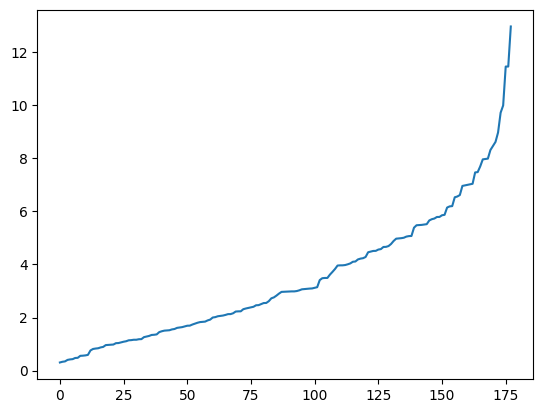

Вывод К ближайших соседей:
X1=1.9, X2=17.1, y=1375, расстояние=0.31
X1=1.97, X2=16.8, y=1270, расстояние=0.33
X1=1.95, X2=16.8, y=1480, расстояние=0.35
X1=1.83, X2=17.2, y=990, расстояние=0.40
X1=1.81, X2=17.2, y=1310, расстояние=0.42

Визуализация К ближайших соседей:


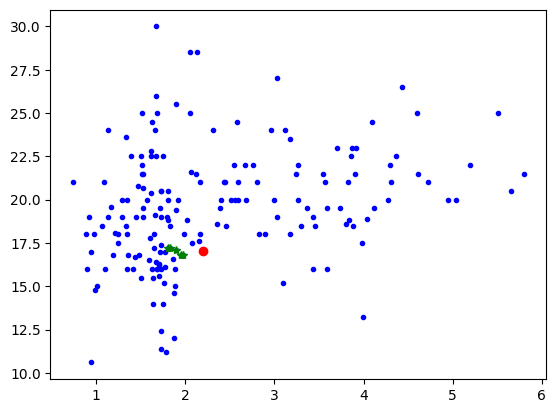


**************************************
Проверяемая точка:  [3.13, 12.44]
**************************************
Вывод отсортированного списка соседей:
X1=3.99, X2=13.2, y=760, расстояние=1.15
X1=1.87, X2=12.0, y=1547, расстояние=1.33
X1=1.73, X2=12.4, y=1150, расстояние=1.40
X1=1.73, X2=11.4, y=1150, расстояние=1.74
X1=1.78, X2=11.2, y=1050, расстояние=1.83
X1=1.75, X2=14.0, y=1190, расстояние=2.08
X1=1.64, X2=14.0, y=1045, расстояние=2.16
X1=1.87, X2=14.6, y=1290, расстояние=2.50
X1=3.1, X2=15.2, y=845, расстояние=2.76
X1=1.89, X2=15.0, y=1095, расстояние=2.84
X1=0.94, X2=10.6, y=520, расстояние=2.86
X1=1.76, X2=15.2, y=1450, расстояние=3.08
X1=0.99, X2=14.8, y=750, расстояние=3.19
X1=1.01, X2=15.0, y=502, расстояние=3.32
X1=1.64, X2=15.5, y=880, расстояние=3.40
X1=1.71, X2=15.6, y=1065, расстояние=3.46
X1=1.5, X2=15.5, y=1020, расстояние=3.47
X1=3.43, X2=16.0, y=372, расстояние=3.57
X1=3.59, X2=16.0, y=1065, расстояние=3.59
X1=1.88, X2=16.0, y=428, расстояние=3.77
X1=1.73, X2=16.0, 

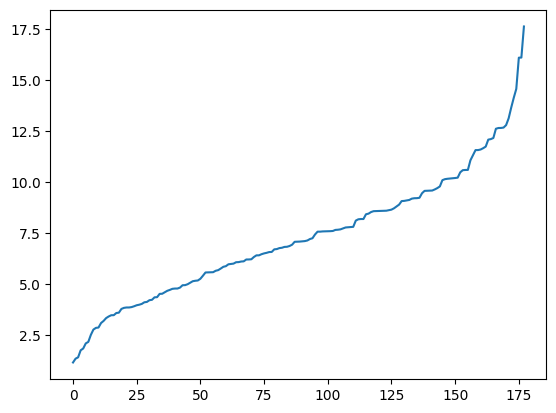

Вывод К ближайших соседей:
X1=3.99, X2=13.2, y=760, расстояние=1.15
X1=1.87, X2=12.0, y=1547, расстояние=1.33
X1=1.73, X2=12.4, y=1150, расстояние=1.40
X1=1.73, X2=11.4, y=1150, расстояние=1.74
X1=1.78, X2=11.2, y=1050, расстояние=1.83

Визуализация К ближайших соседей:


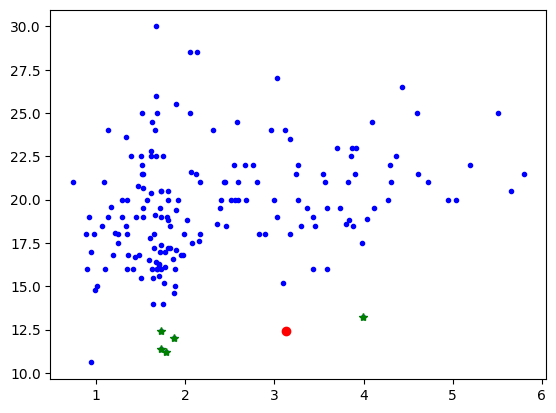


**************************************
Проверяемая точка:  [2.08, 17.61]
**************************************
Вывод отсортированного списка соседей:
X1=2.15, X2=17.6, y=1295, расстояние=0.07
X1=2.08, X2=17.5, y=710, расстояние=0.11
X1=2.16, X2=18.0, y=1510, расстояние=0.40
X1=1.99, X2=18.0, y=345, расстояние=0.40
X1=1.73, X2=17.4, y=1260, расстояние=0.41
X1=1.83, X2=17.2, y=990, расстояние=0.48
X1=1.81, X2=17.2, y=1310, расстояние=0.49
X1=1.6, X2=17.8, y=1015, расстояние=0.52
X1=1.9, X2=17.1, y=1375, расстояние=0.54
X1=1.65, X2=18.0, y=1105, расстояние=0.58
X1=1.65, X2=17.2, y=1265, расстояние=0.59
X1=1.77, X2=17.0, y=885, расстояние=0.68
X1=1.72, X2=17.0, y=1285, расстояние=0.71
X1=1.97, X2=16.8, y=1270, расстояние=0.82
X1=1.95, X2=16.8, y=1480, расстояние=0.82
X1=1.35, X2=18.0, y=630, расстояние=0.83
X1=2.83, X2=18.0, y=290, расстояние=0.85
X1=1.24, X2=17.5, y=650, расстояние=0.85
X1=2.89, X2=18.0, y=500, расстояние=0.90
X1=1.25, X2=18.0, y=630, расстояние=0.92
X1=1.83, X2=18.5, y

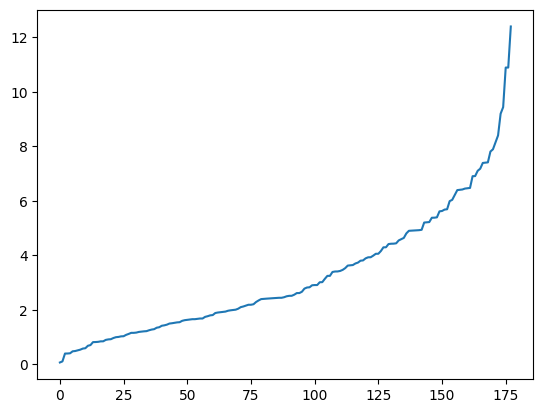

Вывод К ближайших соседей:
X1=2.15, X2=17.6, y=1295, расстояние=0.07
X1=2.08, X2=17.5, y=710, расстояние=0.11
X1=2.16, X2=18.0, y=1510, расстояние=0.40
X1=1.99, X2=18.0, y=345, расстояние=0.40
X1=1.73, X2=17.4, y=1260, расстояние=0.41

Визуализация К ближайших соседей:


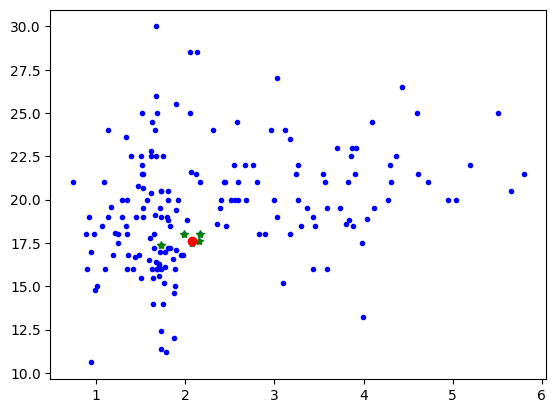


**************************************
Проверяемая точка:  [1.59, 12.6]
**************************************
Вывод отсортированного списка соседей:
X1=1.73, X2=12.4, y=1150, расстояние=0.24
X1=1.87, X2=12.0, y=1547, расстояние=0.66
X1=1.73, X2=11.4, y=1150, расстояние=1.21
X1=1.64, X2=14.0, y=1045, расстояние=1.40
X1=1.75, X2=14.0, y=1190, расстояние=1.41
X1=1.78, X2=11.2, y=1050, расстояние=1.41
X1=1.87, X2=14.6, y=1290, расстояние=2.02
X1=0.94, X2=10.6, y=520, расстояние=2.10
X1=0.99, X2=14.8, y=750, расстояние=2.28
X1=1.89, X2=15.0, y=1095, расстояние=2.42
X1=1.01, X2=15.0, y=502, расстояние=2.47
X1=3.99, X2=13.2, y=760, расстояние=2.47
X1=1.76, X2=15.2, y=1450, расстояние=2.61
X1=1.64, X2=15.5, y=880, расстояние=2.90
X1=1.5, X2=15.5, y=1020, расстояние=2.90
X1=1.71, X2=15.6, y=1065, расстояние=3.00
X1=3.1, X2=15.2, y=845, расстояние=3.01
X1=1.63, X2=16.0, y=780, расстояние=3.40
X1=1.68, X2=16.0, y=1035, расстояние=3.40
X1=1.68, X2=16.0, y=985, расстояние=3.40
X1=1.73, X2=16.0, y

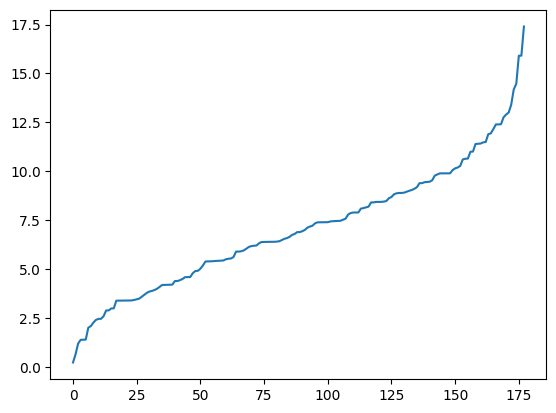

Вывод К ближайших соседей:
X1=1.73, X2=12.4, y=1150, расстояние=0.24
X1=1.87, X2=12.0, y=1547, расстояние=0.66
X1=1.73, X2=11.4, y=1150, расстояние=1.21
X1=1.64, X2=14.0, y=1045, расстояние=1.40
X1=1.75, X2=14.0, y=1190, расстояние=1.41

Визуализация К ближайших соседей:


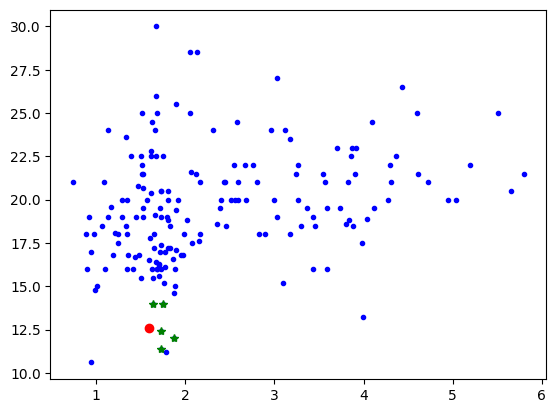


**************************************
Проверяемая точка:  [4.1, 16.67]
**************************************
Вывод отсортированного списка соседей:
X1=3.98, X2=17.5, y=680, расстояние=0.84
X1=3.59, X2=16.0, y=1065, расстояние=0.84
X1=3.43, X2=16.0, y=372, расстояние=0.95
X1=3.17, X2=18.0, y=406, расстояние=1.62
X1=3.1, X2=15.2, y=845, расстояние=1.78
X1=2.89, X2=18.0, y=500, расстояние=1.80
X1=2.83, X2=18.0, y=290, расстояние=1.84
X1=3.88, X2=18.5, y=855, расстояние=1.84
X1=3.45, X2=18.5, y=675, расстояние=1.94
X1=3.8, X2=18.6, y=770, расстояние=1.95
X1=3.3, X2=18.5, y=675, расстояние=2.00
X1=1.97, X2=16.8, y=1270, расстояние=2.13
X1=3.84, X2=18.8, y=1035, расстояние=2.15
X1=1.95, X2=16.8, y=1480, расстояние=2.15
X1=2.15, X2=17.6, y=1295, расстояние=2.16
X1=2.08, X2=17.5, y=710, расстояние=2.18
X1=4.04, X2=18.9, y=1080, расстояние=2.23
X1=1.86, X2=16.6, y=1035, расстояние=2.24
X1=1.9, X2=17.1, y=1375, расстояние=2.24
X1=1.88, X2=16.0, y=428, расстояние=2.32
X1=1.83, X2=17.2, y=990, 

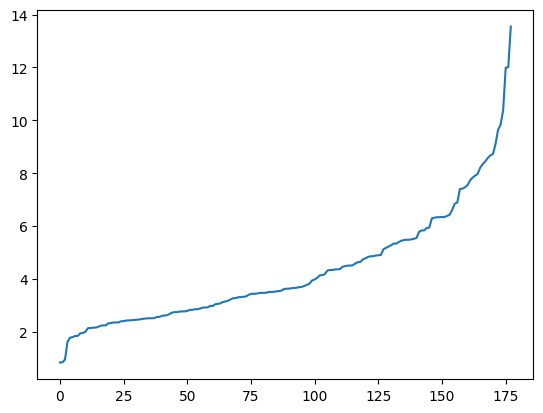

Вывод К ближайших соседей:
X1=3.98, X2=17.5, y=680, расстояние=0.84
X1=3.59, X2=16.0, y=1065, расстояние=0.84
X1=3.43, X2=16.0, y=372, расстояние=0.95
X1=3.17, X2=18.0, y=406, расстояние=1.62
X1=3.1, X2=15.2, y=845, расстояние=1.78

Визуализация К ближайших соседей:


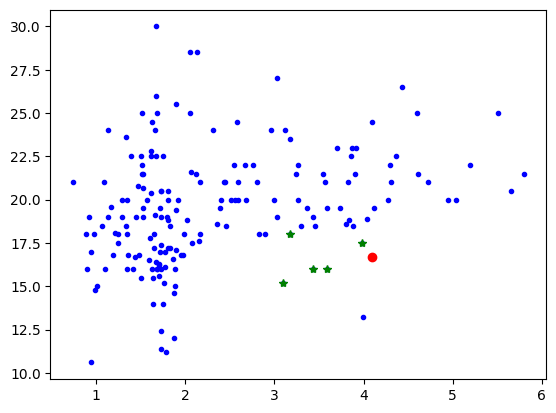

[np.float64(1285.0),
 np.float64(1131.4),
 np.float64(1024.0),
 np.float64(1216.4),
 np.float64(673.6)]

In [21]:
# Для всех объектов тестовой выборки (регрессия)
simple_knn_regr_prediction = simple_knn_regr.predict(K=5, \
                          prediction_type=PredictionType.REGRESSION, \
                          X_test=data_test[['x1','x2']])
simple_knn_regr_prediction

## Использование классов scikit-learn

In [22]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

### Классификация

In [23]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifierObj

KNeighborsClassifier(n_neighbors=3)

In [24]:
KNeighborsClassifierObj.fit(data_train[['x1','x2']], data_train['y_clas'])
KNeighborsClassifierObj.predict(data_test[['x1','x2']])

array([0, 0, 0, 0, 0])

In [25]:
simple_knn_clas = SimpleKNN()
simple_knn_clas.fit(data_train[['x1','x2']], data_train['y_clas'])
simple_knn_clas_prediction = simple_knn_clas.predict(K=3, \
                          prediction_type=PredictionType.CLASSIFICATION, \
                          X_test=data_test[['x1','x2']], verbose = False)
np.array(simple_knn_clas_prediction)

array([0, 0, 0, 0, 0])

### Регрессия

In [26]:
KNeighborsRegressorObj = KNeighborsRegressor()
KNeighborsRegressorObj

KNeighborsRegressor()

In [27]:
KNeighborsRegressorObj.fit(data_train[['x1','x2']], data_train['y'])
KNeighborsRegressorObj.predict(data_test[['x1','x2']])

array([1285. , 1131.4, 1024. , 1216.4,  673.6])

In [28]:
simple_knn_regr = SimpleKNN()
simple_knn_regr.fit(data_train[['x1','x2']], data_train['y'])
simple_knn_regr_prediction = simple_knn_regr.predict(K=5, \
                          prediction_type=PredictionType.REGRESSION, \
                          X_test=data_test[['x1','x2']], verbose = False)
np.array(simple_knn_regr_prediction)

array([1285. , 1131.4, 1024. , 1216.4,  673.6])